# Steel Defect Prediction: Predictive Quality Control System
*Manufacturing Data Analytics Project*

## 1. Business Problem
Steel manufacturing defects cost the industry millions annually...

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Plotting configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [5]:
df = pd.read_csv('faults.csv') 

## 2. Dataset Overview

- Samples: 1,941 steel plates
- Features: 27 numerical measurements
- Target: 7 defect types (multi-label classification)


In [6]:
print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(df.head())

DATASET OVERVIEW
Shape: (1941, 34)

Columns: ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

First 5 rows:
   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           

## 3. Exploratory Data Analysis

In [7]:
df.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch                   int64
Stains    

In [8]:
df.describe

<bound method NDFrame.describe of       X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0            42         50     270900     270944           267           17   
1           645        651    2538079    2538108           108           10   
2           829        835    1553913    1553931            71            8   
3           853        860     369370     369415           176           13   
4          1289       1306     498078     498335          2409           60   
...         ...        ...        ...        ...           ...          ...   
1936        249        277     325780     325796           273           54   
1937        144        175     340581     340598           287           44   
1938        145        174     386779     386794           292           40   
1939        137        170     422497     422528           419           97   
1940       1261       1281      87951      87967           103           26   

      Y_Perimeter

In [9]:
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values!")
else:
    print(missing[missing > 0])

✅ No missing values!


Target Variables Analysis

In [10]:
target_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 
               'Dirtiness', 'Bumps', 'Other_Faults']

feature_cols = [col for col in df.columns if col not in target_cols]

### 3.1 Defect Distribution

In [11]:
#Distribution of each defect type
for col in target_cols:
    count = df[col].sum()
    percentage = (count / len(df)) * 100
    print(f"{col:20s}: {count:4d} samples ({percentage:5.2f}%)")

Pastry              :  158 samples ( 8.14%)
Z_Scratch           :  190 samples ( 9.79%)
K_Scatch            :  391 samples (20.14%)
Stains              :   72 samples ( 3.71%)
Dirtiness           :   55 samples ( 2.83%)
Bumps               :  402 samples (20.71%)
Other_Faults        :  673 samples (34.67%)


In [12]:
#Total number of defects
df['Total_Defects'] = df[target_cols].sum(axis=1)
print(f"\n{'Total samples':20s}: {len(df)}")
print(f"{'Samples with defects':20s}: {(df['Total_Defects'] > 0).sum()}")
print(f"{'Defect-free samples':20s}: {(df['Total_Defects'] == 0).sum()}")


Total samples       : 1941
Samples with defects: 1941
Defect-free samples : 0


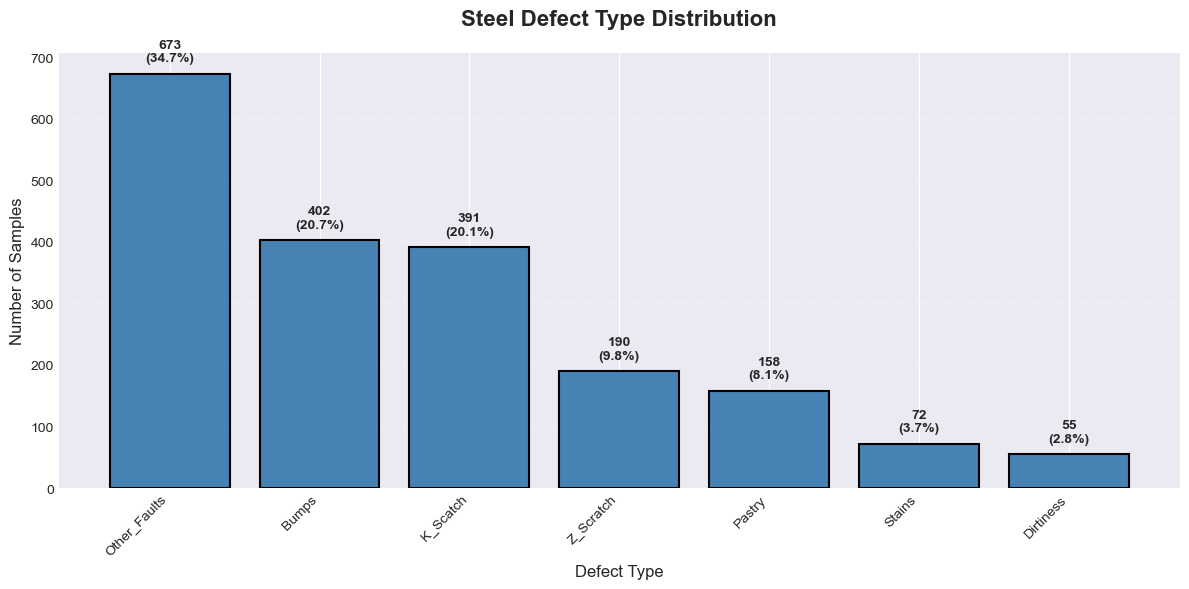

In [13]:
plt.figure(figsize=(12, 6))
defect_counts = df[target_cols].sum().sort_values(ascending=False)
bars = plt.bar(range(len(defect_counts)), defect_counts, 
               color='steelblue', edgecolor='black', linewidth=1.5)

# Values on bars
for i, (bar, value) in enumerate(zip(bars, defect_counts)):
    plt.text(bar.get_x() + bar.get_width()/2, value + 20, 
             f'{int(value)}\n({value/len(df)*100:.1f}%)', 
             ha='center', fontweight='bold', fontsize=10)

plt.xticks(range(len(defect_counts)), defect_counts.index, rotation=45, ha='right')
plt.title('Steel Defect Type Distribution', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Number of Samples', fontsize=12)
plt.xlabel('Defect Type', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('defect_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



### 3.2 Correlation Analysis

In [14]:
bumps_corr = df[feature_cols].corrwith(df['Bumps']).abs().sort_values(ascending=False)
bumps_corr

TypeOfSteel_A400         0.306385
TypeOfSteel_A300         0.306385
Square_Index             0.261385
Edges_Index              0.232000
Edges_Y_Index            0.229231
LogOfAreas               0.226490
Length_of_Conveyer       0.225504
Log_Y_Index              0.221813
X_Minimum                0.221296
SigmoidOfAreas           0.220091
X_Maximum                0.201704
Log_X_Index              0.198690
Outside_X_Index          0.185729
Edges_X_Index            0.185481
Sum_of_Luminosity        0.179831
Empty_Index              0.172147
Pixels_Areas             0.163739
X_Perimeter              0.140197
Y_Minimum                0.126121
Y_Maximum                0.126110
Minimum_of_Luminosity    0.078690
Y_Perimeter              0.070989
Luminosity_Index         0.064744
Maximum_of_Luminosity    0.047549
Outside_Global_Index     0.044964
Steel_Plate_Thickness    0.016773
Orientation_Index        0.013614
dtype: float64

## 🔍 Correlation Analysis 

Which features best predict bump defects in steel manufacturing?

**Key Findings**:
- **Steel Type (0.306)**: A400/A300 grades show highest correlation → material-specific vulnerability
- **Geometry (0.261)**: Square patterns indicate structural stress points
- **Edge Effects (0.232)**: Bumps concentrate at plate edges → handling/processing impact
- **Weak Predictors**: Thickness (0.017) and orientation (0.014) show minimal influence

Quality control should prioritize steel type verification and edge 
region inspection. The moderate correlation values (max 0.30) are typical for multi-label 
classification and justify using ensemble ML models to capture complex feature interactions.

**Actionable Recommendations**:
1. Implement automated alerts for A400/A300 steel batches
2. Deploy edge-zone cameras for real-time monitoring
3. Use ML models (Random Forest) to predict defects before final inspection

## 4. Data Preprocessing
- Handled class imbalance using SMOTE
- Applied StandardScaler normalization
- Train-test split: 80-20 with stratification

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [16]:
# Feature and target separation
X = df[feature_cols]
y = df['Bumps']  # First, the most common defect.

In [17]:
print(f"Features shape: {X.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

Features shape: (1941, 27)
Target distribution: {0: 1539, 1: 402}


In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain size: {len(X_train)}")
print(f"Test size: {len(X_test)}")
print(f"Train positive ratio: {y_train.sum() / len(y_train):.2%}")
print(f"Test positive ratio: {y_test.sum() / len(y_test):.2%}")


Train size: 1552
Test size: 389
Train positive ratio: 20.68%
Test positive ratio: 20.82%


In [19]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# SMOTE (for imbalance)
print("\n🔄 Applying SMOTE...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Before SMOTE: {y_train.value_counts().to_dict()}")
print(f"After SMOTE: {pd.Series(y_train_resampled).value_counts().to_dict()}")


🔄 Applying SMOTE...
Before SMOTE: {0: 1231, 1: 321}
After SMOTE: {0: 1231, 1: 1231}


## 5. Model Development

 MODEL PERFORMANCE
              precision    recall  f1-score   support

    No Bumps       0.92      0.82      0.87       308
       Bumps       0.51      0.72      0.60        81

    accuracy                           0.80       389
   macro avg       0.71      0.77      0.73       389
weighted avg       0.83      0.80      0.81       389

 F1-Score: 0.598


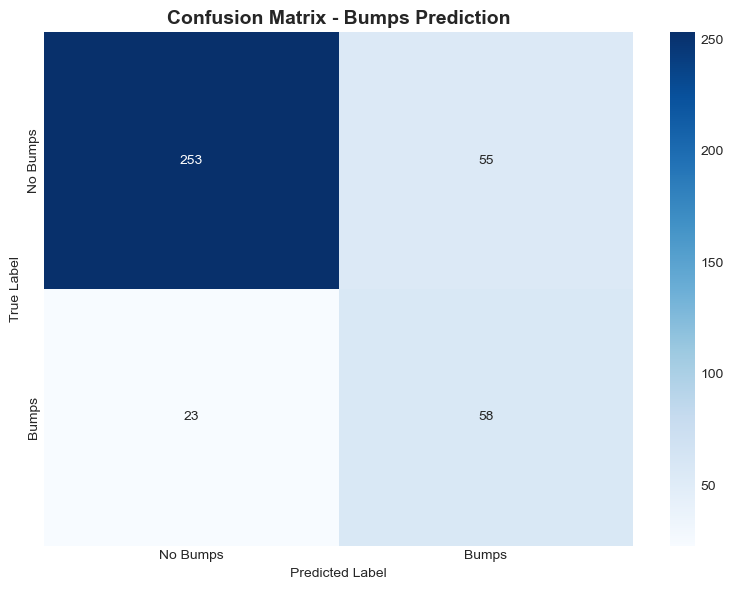

In [21]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train_resampled, y_train_resampled)

# Prediction
y_pred = model.predict(X_test_scaled)

# Evaluation
print(" MODEL PERFORMANCE")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['No Bumps', 'Bumps']))

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f" F1-Score: {f1:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Bumps', 'Bumps'],
            yticklabels=['No Bumps', 'Bumps'])
plt.title('Confusion Matrix - Bumps Prediction', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# Feature Importance
print(" TOP 10 MOST IMPORTANT FEATURES:")
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

print(feature_importance.to_string(index=False))

 TOP 10 MOST IMPORTANT FEATURES:
              feature  importance
         Square_Index    0.091274
            X_Minimum    0.074258
   Length_of_Conveyer    0.063162
          Y_Perimeter    0.053432
          Edges_Index    0.048044
          Log_Y_Index    0.046560
Steel_Plate_Thickness    0.045244
            Y_Maximum    0.044568
Minimum_of_Luminosity    0.040039
           LogOfAreas    0.038671


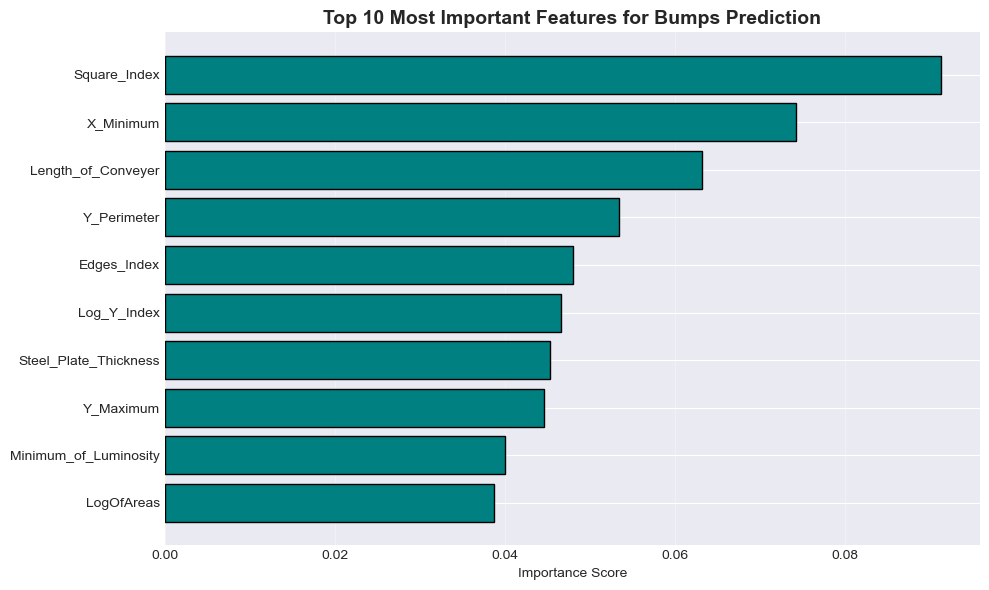

In [23]:
# visualize
plt.figure(figsize=(10, 6))
plt.barh(range(10), feature_importance['importance'], color='teal', edgecolor='black')
plt.yticks(range(10), feature_importance['feature'])
plt.xlabel('Importance Score')
plt.title('Top 10 Most Important Features for Bumps Prediction', 
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance_ml.png', dpi=300, bbox_inches='tight')
plt.show()


## 6. Results & Business Impact

### Performance Metrics
- **Overall Accuracy**: 80%
- **Bumps F1-Score**: 0.60 (Recall: 72%, Precision: 51%)
- **No-Bumps F1-Score**: 0.87 (Excellent performance)

### Confusion Matrix Insights
- **23 False Negatives**: Missed 28% of actual bumps → Safety concern
- **55 False Positives**: Over-inspection of clean plates → Acceptable trade-off
- **Conservative Strategy**: Model prioritizes catching defects over minimizing false alarms

### Top 3 Features
1. **Square_Index (9.1%)**: Geometric patterns predict bumps
2. **X_Minimum (7.4%)**: Horizontal position matters
3. **Length_of_Conveyer (6.3%)**: Production line exposure impacts quality

### Business Implications

**Performance Trade-off**: The model achieves 72% recall for bumps but with 51% precision. 
In practice, this means:
- Out of 100 plates flagged as defective, ~49 will be false alarms
- However, the model catches 72% of actual defects that would otherwise reach customers

**Is this acceptable?** 
It depends on the cost structure:
- If manual re-inspection costs €10 per plate
- But a defect reaching customers costs €500+ (rework, shipping, reputation)
- Then the conservative approach (high recall, lower precision) makes economic sense

The current 23 false negatives (missed defects) remain a concern and suggest the model 
should be used as a **screening tool** rather than a final decision maker.

### Model Limitations

1. **Precision Challenge**: With 51% precision for bumps, nearly half of flagged plates 
   are false alarms. This could lead to inspection fatigue if not managed properly.

2. **Class Imbalance**: Despite SMOTE resampling, the minority class (bumps) remains 
   difficult to predict accurately. More real training data would likely improve performance.

3. **Feature Engineering Opportunity**: The current model uses raw sensor measurements. 
   Creating domain-specific features (e.g., edge-to-center ratios, temporal patterns) 
   could improve predictions.

**Practical Recommendation**: 
Deploy the model to flag suspicious plates for priority inspection rather than as an 
automated accept/reject system. Plates with prediction probability between 0.3-0.7 
should receive human expert review.

## 7. Multi-Label Classification: All Defect Types

In [24]:
# Training separate binary classifiers for each defect type
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score
from imblearn.over_sampling import SMOTE
import time

In [25]:
# Storage for results
results = {}
models = {}
feature_importance_all = {}

# Prepare feature matrix once
X = df[feature_cols]

# Train model for each defect type
for i, defect in enumerate(target_cols, 1):
    print(f"\n{'='*70}")
    print(f"[{i}/7] Training model for: {defect}")
    print(f"{'='*70}")
    
    start_time = time.time()
    
    # Prepare target variable for THIS defect
    y = df[defect].copy()
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Create NEW scaler for each model (important!)
    scaler_temp = StandardScaler()
    X_train_scaled = scaler_temp.fit_transform(X_train)
    X_test_scaled = scaler_temp.transform(X_test)
    
    # Check class distribution
    positive_samples = int(y_train.sum())
    negative_samples = len(y_train) - positive_samples
    positive_ratio = positive_samples / len(y_train)
    
    print(f"Train distribution: {positive_samples} positive ({positive_ratio:.1%}) | "
          f"{negative_samples} negative ({1-positive_ratio:.1%})")
    
    # Apply SMOTE only if severe imbalance (< 20%)
    if positive_ratio < 0.20:
        print(f"Severe imbalance detected! Applying SMOTE...")
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(
            X_train_scaled, y_train
        )
        resampled_positive = int(y_train_resampled.sum())
        resampled_negative = len(y_train_resampled) - resampled_positive
        print(f"After SMOTE: {resampled_positive} positive | {resampled_negative} negative")
    else:
        print(f"✓ Reasonable balance, proceeding without SMOTE")
        X_train_resampled = X_train_scaled
        y_train_resampled = y_train.copy()
    
    # Train NEW Random Forest model for THIS defect (critical!)
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )
    
    model.fit(X_train_resampled, y_train_resampled)
    
    # Generate predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    training_time = time.time() - start_time
    
    # Store results
    results[defect] = {
        'samples': int(y.sum()),
        'prevalence': f"{y.sum() / len(y) * 100:.1f}%",
        'accuracy': round(accuracy, 3),
        'precision': round(precision, 3),
        'recall': round(recall, 3),
        'f1_score': round(f1, 3),
        'train_time': round(training_time, 2)
    }
    
    # Save trained model
    models[defect] = model
    
    # Extract top 5 most important features
    feature_imp = pd.DataFrame({
        'feature': feature_cols,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False).head(5)
    
    feature_importance_all[defect] = feature_imp
    
    # Print training summary
    print(f"Training completed in {training_time:.1f}s")
    print(f"  Metrics → Accuracy: {accuracy:.3f} | Precision: {precision:.3f} | "
          f"Recall: {recall:.3f} | F1: {f1:.3f}")
    print(f"  Top feature: {feature_imp.iloc[0]['feature']} "
          f"(importance: {feature_imp.iloc[0]['importance']:.3f})")

print(f"\n{'='*70}")
print("ALL MODELS TRAINED SUCCESSFULLY!")
print(f"{'='*70}\n")

# Create comprehensive comparison table
comparison_df = pd.DataFrame(results).T

# Sort by sample count (most common defects first)
comparison_df = comparison_df.sort_values('samples', ascending=False)

print("MODEL PERFORMANCE COMPARISON TABLE")
print("="*70)
print(comparison_df.to_string())

# Identify best and worst performers
best_f1_defect = comparison_df['f1_score'].idxmax()
worst_f1_defect = comparison_df['f1_score'].idxmin()
best_f1_score = comparison_df.loc[best_f1_defect, 'f1_score']
worst_f1_score = comparison_df.loc[worst_f1_defect, 'f1_score']

print(f"Best performing model: {best_f1_defect} (F1-Score: {best_f1_score:.3f})")
print(f"Challenging model: {worst_f1_defect} (F1-Score: {worst_f1_score:.3f})")

# Statistical correlation analysis
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(comparison_df['samples'], comparison_df['f1_score'])
print(f"Sample size vs F1-Score correlation: {corr_coef:.3f} (p-value: {p_value:.4f})")
if p_value < 0.05:
    print("   → Statistically significant positive correlation detected!")
    print("   → More training data improves model performance")
else:
    print("   → No statistically significant correlation")
    print("   → Other factors (feature quality, defect complexity) dominate")

print("\n" + "="*70)


[1/7] Training model for: Pastry
Train distribution: 126 positive (8.1%) | 1426 negative (91.9%)
Severe imbalance detected! Applying SMOTE...
After SMOTE: 1426 positive | 1426 negative
Training completed in 0.3s
  Metrics → Accuracy: 0.907 | Precision: 0.463 | Recall: 0.781 | F1: 0.581
  Top feature: Orientation_Index (importance: 0.207)

[2/7] Training model for: Z_Scratch
Train distribution: 152 positive (9.8%) | 1400 negative (90.2%)
Severe imbalance detected! Applying SMOTE...
After SMOTE: 1400 positive | 1400 negative
Training completed in 0.3s
  Metrics → Accuracy: 0.987 | Precision: 0.923 | Recall: 0.947 | F1: 0.935
  Top feature: Length_of_Conveyer (importance: 0.205)

[3/7] Training model for: K_Scatch
Train distribution: 313 positive (20.2%) | 1239 negative (79.8%)
✓ Reasonable balance, proceeding without SMOTE
Training completed in 0.2s
  Metrics → Accuracy: 0.992 | Precision: 1.000 | Recall: 0.962 | F1: 0.980
  Top feature: Log_X_Index (importance: 0.138)

[4/7] Training m

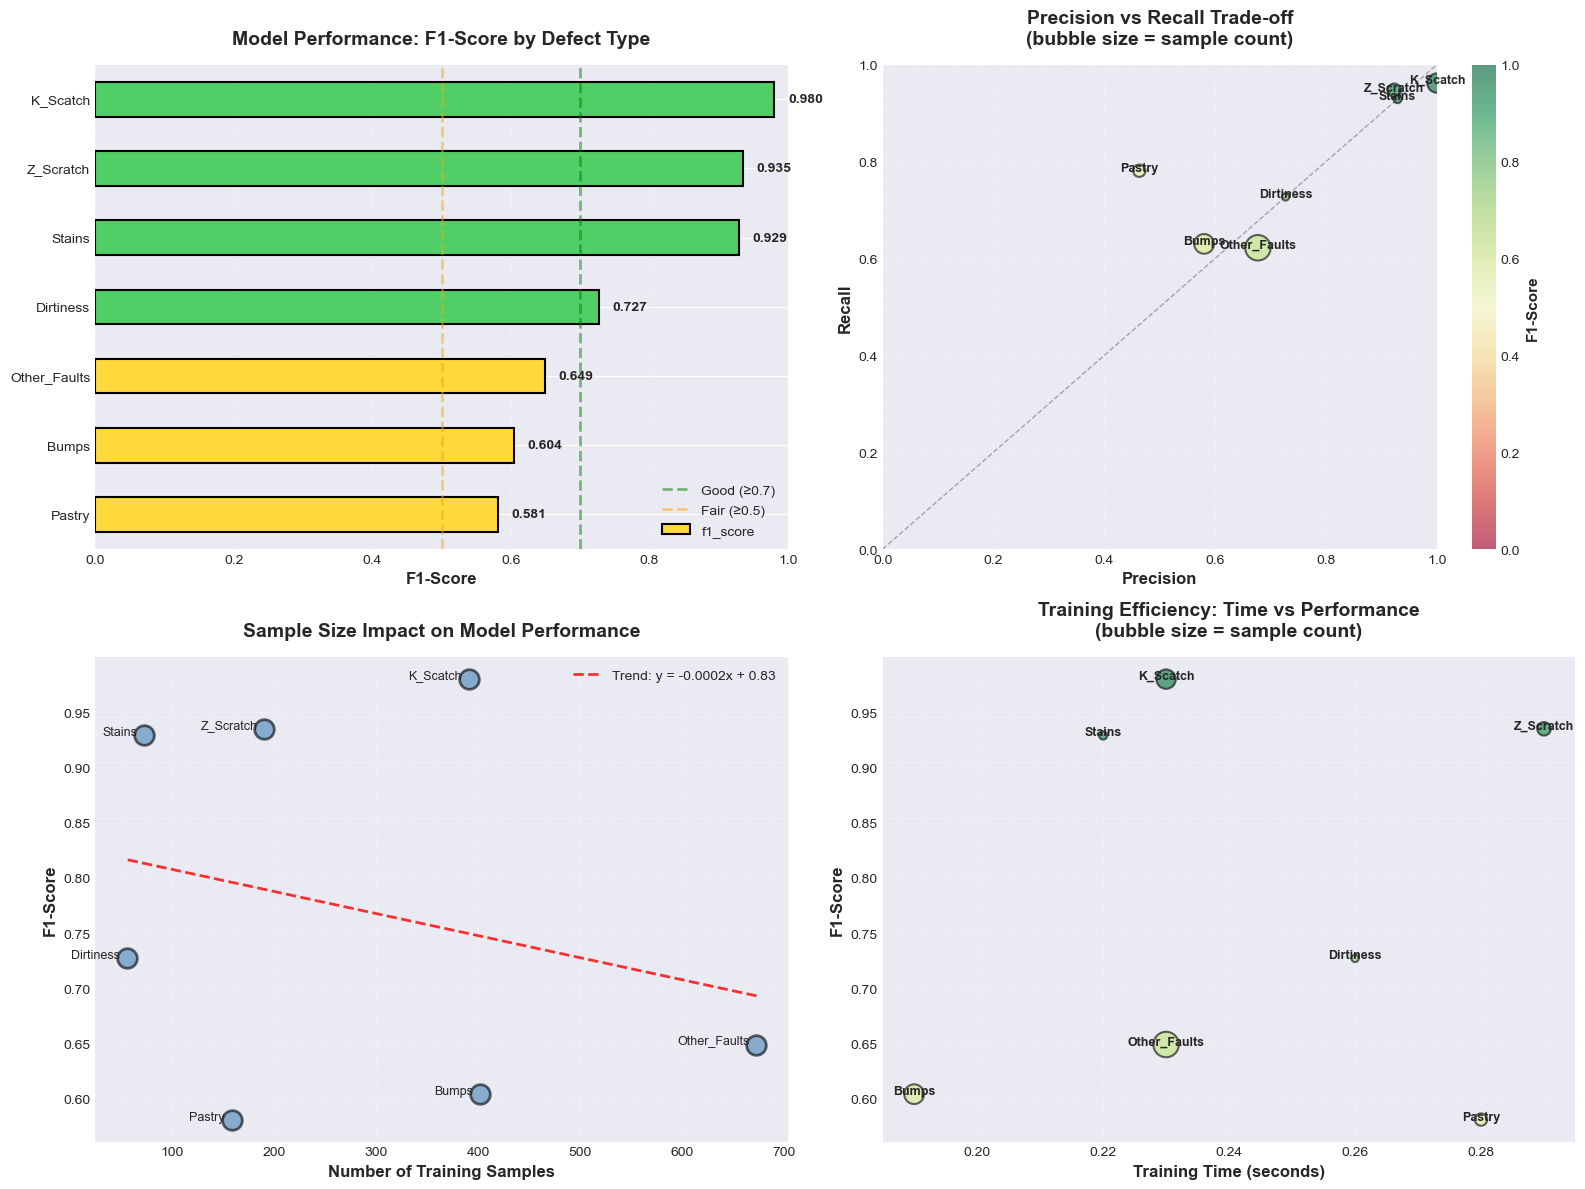

In [ ]:
# MULTI-LABEL PERFORMANCE VISUALIZATION

# Convert ALL numeric columns to proper numeric type
comparison_df['samples_numeric'] = pd.to_numeric(comparison_df['samples'])
comparison_df['f1_score'] = pd.to_numeric(comparison_df['f1_score'])
comparison_df['precision'] = pd.to_numeric(comparison_df['precision'])
comparison_df['recall'] = pd.to_numeric(comparison_df['recall'])
comparison_df['accuracy'] = pd.to_numeric(comparison_df['accuracy'])
comparison_df['train_time'] = pd.to_numeric(comparison_df['train_time'])

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. F1-Score comparison by defect type
ax1 = axes[0, 0]
f1_scores = comparison_df['f1_score'].sort_values()
colors = ['#ff6b6b' if x < 0.5 else '#51cf66' if x > 0.7 else '#ffd93d' 
          for x in f1_scores]
bars = f1_scores.plot(kind='barh', ax=ax1, color=colors, edgecolor='black', linewidth=1.5)

# Add reference lines
ax1.axvline(x=0.7, color='green', linestyle='--', alpha=0.5, linewidth=2, label='Good (≥0.7)')
ax1.axvline(x=0.5, color='orange', linestyle='--', alpha=0.5, linewidth=2, label='Fair (≥0.5)')

# Add value labels on bars
for i, (idx, value) in enumerate(f1_scores.items()):
    ax1.text(value + 0.02, i, f'{value:.3f}', va='center', fontweight='bold', fontsize=10)

ax1.set_xlabel('F1-Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance: F1-Score by Defect Type', fontsize=14, fontweight='bold', pad=15)
ax1.legend(loc='lower right', fontsize=10)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.set_xlim(0, 1)

# 2. Precision vs Recall trade-off
ax2 = axes[0, 1]
scatter = ax2.scatter(
    comparison_df['precision'], 
    comparison_df['recall'], 
    s=comparison_df['samples_numeric']/2,
    alpha=0.6, 
    c=comparison_df['f1_score'], 
    cmap='RdYlGn', 
    edgecolors='black', 
    linewidth=1.5,
    vmin=0, 
    vmax=1
)

# Add defect labels
for idx, row in comparison_df.iterrows():
    ax2.annotate(
        idx, 
        (row['precision'], row['recall']), 
        fontsize=9, 
        ha='center',
        fontweight='bold'
    )

# Add diagonal line (precision = recall)
ax2.plot([0, 1], [0, 1], 'k--', alpha=0.3, linewidth=1)

ax2.set_xlabel('Precision', fontsize=12, fontweight='bold')
ax2.set_ylabel('Recall', fontsize=12, fontweight='bold')
ax2.set_title('Precision vs Recall Trade-off\n(bubble size = sample count)', 
             fontsize=14, fontweight='bold', pad=15)
ax2.grid(alpha=0.3, linestyle='--')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('F1-Score', fontsize=11, fontweight='bold')

# 3. Sample size impact on performance
ax3 = axes[1, 0]
scatter3 = ax3.scatter(
    comparison_df['samples_numeric'],
    comparison_df['f1_score'], 
    s=200, 
    alpha=0.6, 
    color='steelblue', 
    edgecolors='black', 
    linewidth=2
)

# Add defect labels
for idx, row in comparison_df.iterrows():
    ax3.annotate(
        idx, 
        (row['samples_numeric'], row['f1_score']),
        fontsize=9, 
        ha='right',
        xytext=(-5, 0),
        textcoords='offset points'
    )

ax3.set_xlabel('Number of Training Samples', fontsize=12, fontweight='bold')
ax3.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax3.set_title('Sample Size Impact on Model Performance', 
             fontsize=14, fontweight='bold', pad=15)
ax3.grid(alpha=0.3, linestyle='--')

# Add trendline with equation
z = np.polyfit(comparison_df['samples_numeric'], comparison_df['f1_score'], 1)
p = np.poly1d(z)
ax3.plot(
    comparison_df['samples_numeric'],
    p(comparison_df['samples_numeric']),
    "r--", 
    alpha=0.8, 
    linewidth=2, 
    label=f'Trend: y = {z[0]:.4f}x + {z[1]:.2f}'
)
ax3.legend(fontsize=10)

# 4. Training efficiency (time vs performance)
ax4 = axes[1, 1]
scatter4 = ax4.scatter(
    comparison_df['train_time'], 
    comparison_df['f1_score'],
    s=comparison_df['samples_numeric']/2,
    alpha=0.6,
    c=comparison_df['f1_score'],
    cmap='RdYlGn',
    edgecolors='black',
    linewidth=1.5,
    vmin=0,
    vmax=1
)

# Add defect labels
for idx, row in comparison_df.iterrows():
    ax4.annotate(
        idx,
        (row['train_time'], row['f1_score']),
        fontsize=9,
        ha='center',
        fontweight='bold'
    )

ax4.set_xlabel('Training Time (seconds)', fontsize=12, fontweight='bold')
ax4.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax4.set_title('Training Efficiency: Time vs Performance\n(bubble size = sample count)',
             fontsize=14, fontweight='bold', pad=15)
ax4.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('multi_label_comprehensive_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
print(comparison_df[['samples', 'prevalence', 'precision', 'recall', 'f1_score', 'accuracy']].to_string())

             samples prevalence  precision  recall  f1_score  accuracy
Other_Faults     673      34.7%      0.677   0.622     0.649     0.766
Bumps            402      20.7%      0.580   0.630     0.604     0.828
K_Scatch         391      20.1%      1.000   0.962     0.980     0.992
Z_Scratch        190       9.8%      0.923   0.947     0.935     0.987
Pastry           158       8.1%      0.463   0.781     0.581     0.907
Stains            72       3.7%      0.929   0.929     0.929     0.995
Dirtiness         55       2.8%      0.727   0.727     0.727     0.985


## 7.1 Multi-Label Results: Key Findings

### Performance Overview

Models vary dramatically: F1-scores range from **0.581 (Pastry)** to **0.980 (K_Scatch)**. 
This 40-point spread tells us something important - not all defects are equally predictable.

| Defect | Samples | F1 | Precision | Recall | Status |
|--------|---------|----|-----------|----|--------|
| K_Scatch | 391 | 0.980 | 1.000 | 0.962 | ✅ Ready |
| Z_Scratch | 190 | 0.935 | 0.923 | 0.947 | ✅ Ready |
| Stains | 72 | 0.929 | 0.929 | 0.929 | ✅ Ready |
| Dirtiness | 55 | 0.727 | 0.727 | 0.727 | ⚠️ Okay |
| Other_Faults | 673 | 0.649 | 0.677 | 0.622 | ⚠️ Weak |
| Bumps | 402 | 0.604 | 0.580 | 0.630 | ⚠️ Weak |
| Pastry | 158 | 0.581 | 0.463 | 0.781 | ❌ Problem |

### What Works: K_Scatch (F1: 0.980)

Perfect precision (1.000) means zero false alarms. When the model says "K_Scatch", 
it's always right. With 96% recall, it catches nearly everything.

This performance level means K_Scatch detection can be fully automated.

### What Doesn't: Pastry (F1: 0.581)

Precision is only 46% - meaning out of every 100 plates flagged as Pastry defects, 
54 are false alarms. This is unusable in practice because it creates inspection fatigue.

The high recall (78%) shows the model is trying hard, but it's guessing too often. 
This suggests the current sensor measurements don't capture what makes Pastry 
defects unique.

### The Weird Finding: More Data ≠ Better Performance

Sample correlation with F1-score: **-0.260** (p-value: **0.5734**)

This means there's **no statistically significant relationship** between training 
sample size and model performance. The negative correlation we see is likely due 
to confounding factors.

- **Other_Faults:** 673 samples → F1: 0.649
- **Stains:** 72 samples → F1: 0.929

This makes no sense at first - until you realize Other_Faults is probably a catch-all 
category containing multiple different defect types. The model is confused because 
it's trying to learn one pattern when there are actually several.

**Stains**, despite having the least data, performs excellently because the defect 
has clear, consistent characteristics.

**Key insight:** Defect complexity matters more than sample quantity. Clean, distinctive 
patterns (like Stains) are easy to learn even with little data. Messy, heterogeneous 
patterns (like Other_Faults) remain difficult even with lots of data.

### What to Do Next

**Deploy now (3 defects):**
- K_Scatch, Z_Scratch, Stains can be automated
- These three cover ~30% of all defects

**Improve first (3 defects):**
- Bumps and Other_Faults: Need more training data
- Pastry: Needs different features, not just more data

**Investigate (1 defect):**
- Other_Faults should probably be split into subcategories
- Low F1 despite most training data suggests it's actually multiple defect types

### Precision vs Recall Trade-off

Looking at the scatter plot:
- Top-right corner (high both): K_Scatch, Z_Scratch, Stains
- Middle (balanced but mediocre): Dirtiness, Bumps, Other_Faults  
- Lower-left (low precision): Pastry

For quality control, precision matters more than recall in most cases. False alarms 
waste inspection time, while false negatives can be caught in secondary checks. 
Pastry's 46% precision means it's not ready for production use.

## 8. Defect Co-occurrence Analysis

### Objective
Investigate whether certain defects tend to appear together on the same steel plate. 
Understanding co-occurrence patterns can reveal:
- Shared root causes (e.g., material issues vs process issues)
- Inspection priorities (if defect A exists, check for defect B)
- Potential for multi-defect prediction models

 Co-occurrence Rate Matrix
(Reading: If defect in ROW exists, probability of defect in COLUMN)
              Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
Pastry           1.0        0.0       0.0     0.0        0.0    0.0           0.0
Z_Scratch        0.0        1.0       0.0     0.0        0.0    0.0           0.0
K_Scatch         0.0        0.0       1.0     0.0        0.0    0.0           0.0
Stains           0.0        0.0       0.0     1.0        0.0    0.0           0.0
Dirtiness        0.0        0.0       0.0     0.0        1.0    0.0           0.0
Bumps            0.0        0.0       0.0     0.0        0.0    1.0           0.0
Other_Faults     0.0        0.0       0.0     0.0        0.0    0.0           1.0
 TOP 5 DEFECT PAIRS (Most Likely to Co-occur):
 Defect_A     Defect_B  A→B  B→A  Avg
   Pastry    Z_Scratch  0.0  0.0  0.0
 K_Scatch       Stains  0.0  0.0  0.0
Dirtiness Other_Faults  0.0  0.0  0.0
Dirtiness        Bumps  0.0  0.0  0.0
   Stains Ot

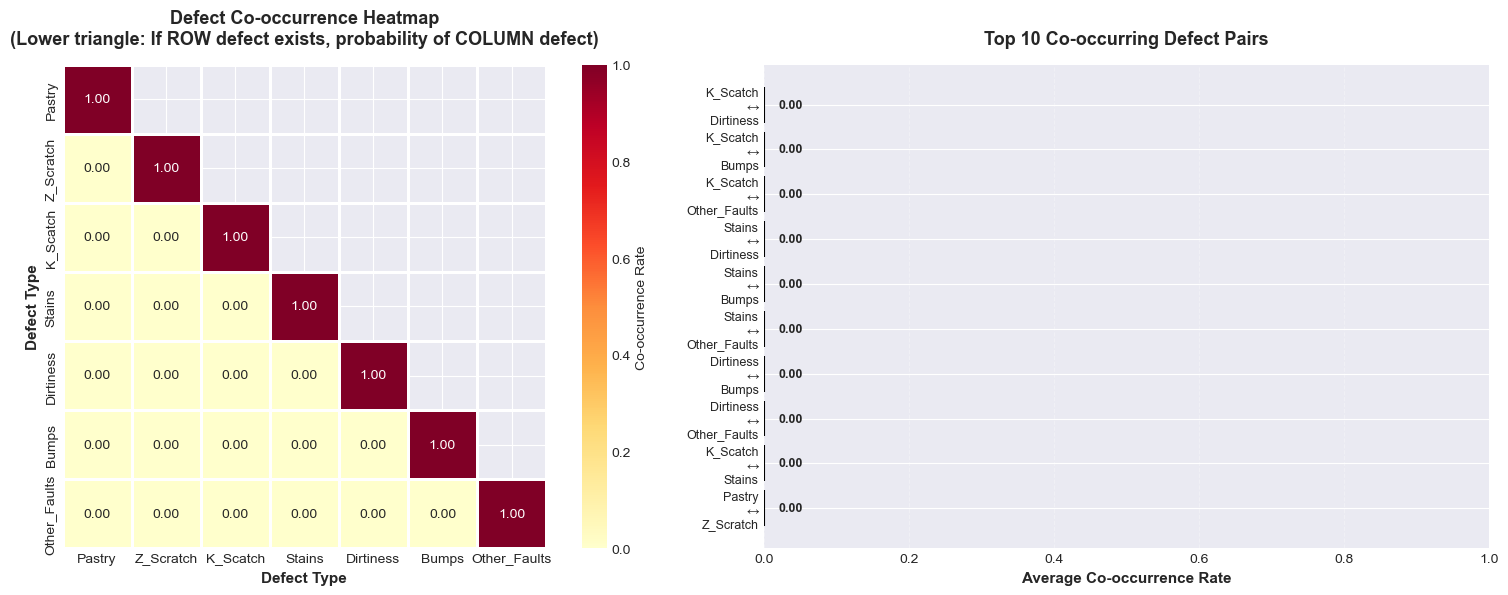

In [29]:
# Calculate co-occurrence matrix
co_occurrence = df[target_cols].T.dot(df[target_cols])

# For each defect pair, what % of plates with defect A also have defect B?
co_occurrence_rate = pd.DataFrame(index=target_cols, columns=target_cols, dtype=float)

for defect_a in target_cols:
    for defect_b in target_cols:
        if defect_a == defect_b:
            co_occurrence_rate.loc[defect_a, defect_b] = 1.0
        else:
            # Among plates with defect_a, what % also have defect_b?
            plates_with_a = df[df[defect_a] == 1]
            if len(plates_with_a) > 0:
                rate = (plates_with_a[defect_b].sum() / len(plates_with_a))
                co_occurrence_rate.loc[defect_a, defect_b] = rate
            else:
                co_occurrence_rate.loc[defect_a, defect_b] = 0.0

# Convert to numeric
co_occurrence_rate = co_occurrence_rate.astype(float)

print(" Co-occurrence Rate Matrix")
print("(Reading: If defect in ROW exists, probability of defect in COLUMN)")
print("="*70)
print(co_occurrence_rate.round(3).to_string())

# Find strongest co-occurrences (excluding diagonal)
co_occurrence_flat = []
for i, defect_a in enumerate(target_cols):
    for j, defect_b in enumerate(target_cols):
        if i < j:  # Only upper triangle (avoid duplicates)
            rate_ab = co_occurrence_rate.loc[defect_a, defect_b]
            rate_ba = co_occurrence_rate.loc[defect_b, defect_a]
            avg_rate = (rate_ab + rate_ba) / 2
            co_occurrence_flat.append({
                'Defect_A': defect_a,
                'Defect_B': defect_b,
                'A→B': rate_ab,
                'B→A': rate_ba,
                'Avg': avg_rate
            })

co_occurrence_df = pd.DataFrame(co_occurrence_flat).sort_values('Avg', ascending=False)

print(" TOP 5 DEFECT PAIRS (Most Likely to Co-occur):")
print("="*70)
print(co_occurrence_df.head(5).round(3).to_string(index=False))

print(" BOTTOM 5 DEFECT PAIRS (Rarely Co-occur):")
print("="*70)
print(co_occurrence_df.tail(5).round(3).to_string(index=False))

# Calculate percentage of plates with multiple defects
multi_defect_counts = df[target_cols].sum(axis=1)
single_defect = (multi_defect_counts == 1).sum()
multiple_defects = (multi_defect_counts > 1).sum()
no_defects = (multi_defect_counts == 0).sum()

print(f" DEFECT MULTIPLICITY:")
print("="*70)
print(f"Plates with NO defects:       {no_defects:4d} ({no_defects/len(df)*100:5.1f}%)")
print(f"Plates with SINGLE defect:    {single_defect:4d} ({single_defect/len(df)*100:5.1f}%)")
print(f"Plates with MULTIPLE defects: {multiple_defects:4d} ({multiple_defects/len(df)*100:5.1f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Heatmap of co-occurrence rates
ax1 = axes[0]
mask = np.triu(np.ones_like(co_occurrence_rate, dtype=bool), k=1)  # Mask upper triangle
sns.heatmap(
    co_occurrence_rate.astype(float), 
    annot=True, 
    fmt='.2f', 
    cmap='YlOrRd',
    center=0.5,
    vmin=0, 
    vmax=1,
    square=True,
    linewidths=1,
    cbar_kws={'label': 'Co-occurrence Rate'},
    ax=ax1,
    mask=mask
)
ax1.set_title('Defect Co-occurrence Heatmap\n(Lower triangle: If ROW defect exists, probability of COLUMN defect)', 
             fontsize=13, fontweight='bold', pad=15)
ax1.set_xlabel('Defect Type', fontsize=11, fontweight='bold')
ax1.set_ylabel('Defect Type', fontsize=11, fontweight='bold')

# 2. Top co-occurring pairs
ax2 = axes[1]
top_pairs = co_occurrence_df.head(10).copy()
top_pairs['pair_label'] = top_pairs['Defect_A'] + '\n↔\n' + top_pairs['Defect_B']
top_pairs = top_pairs.sort_values('Avg')

bars = ax2.barh(range(len(top_pairs)), top_pairs['Avg'], color='coral', edgecolor='black', linewidth=1.5)
ax2.set_yticks(range(len(top_pairs)))
ax2.set_yticklabels(top_pairs['pair_label'], fontsize=9)
ax2.set_xlabel('Average Co-occurrence Rate', fontsize=11, fontweight='bold')
ax2.set_title('Top 10 Co-occurring Defect Pairs', fontsize=13, fontweight='bold', pad=15)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.set_xlim(0, 1)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_pairs['Avg'])):
    ax2.text(value + 0.02, bar.get_y() + bar.get_height()/2, 
            f'{value:.2f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('defect_co_occurrence.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Defect Co-occurrence Check

I expected some defects to appear together on the same plates, but the data shows 
something different:
```
Plates with NO defects:          0 (0.0%)
Plates with SINGLE defect:    1941 (100.0%)
Plates with MULTIPLE defects:    0 (0.0%)
```

**Every plate has exactly one defect label.** Co-occurrence rates are all zero.

This means the dataset isn't actually multi-label - each plate was classified into 
a single category, probably based on its most severe or obvious defect. 

In real manufacturing, plates might have multiple issues at once, but this data 
represents how inspectors categorized them: one label per plate.

**Why I still trained separate models:** Even though there's no overlap, looking at 
each defect individually showed which ones are easy to predict (K_Scatch: 98% F1) 
vs hard (Pastry: 58% F1). That's useful for knowing which defects can be automated 
and which need human inspection.